In [5]:
from utils.codification_cnn import CNNLayer, NNLayer, ChromosomeCNN, FitnessCNN
from utils.codifications import Fitness
from utils.datamanager import DataManager
from GA.parentSelector.parentSelector import RandomParentSelector, TournamentSelection, LinealOrder, WheelSelection
from GA.geneticAlgorithm import GenerationalGA
from time import time
import numpy as np

class Fitness_str(Fitness):
    def set_params(self, c, **args):
        self.c = c
        self.str = c.__repr__()
        self.time = 0
        self.max_cnn = float(c.max_layers['CNN'])
        self.max_nn = float(c.max_layers['NN'])
        self.max_filters = 256
        self.max_units = 1024
        
    def dist(self, a , b):
        return np.sqrt((a - b)**2)
        
    def comp_cnn(self, cnn_layer1, cnn_layer2):
        f = 0
        f += self.dist(cnn_layer1.filters/self.max_filters, cnn_layer2.filters/self.max_filters)
        f += 0.1 if cnn_layer1.activation!=cnn_layer2.activation else 0
        f += np.abs(cnn_layer1.k_size[0] - cnn_layer2.k_size[0]) / 7.
        f += np.abs(cnn_layer1.k_size[1] - cnn_layer2.k_size[1]) / 7.
        f += (cnn_layer1.maxpool != cnn_layer2.maxpool) / 2
        f += self.dist(cnn_layer1.dropout, cnn_layer2.dropout)
        return f
        
    def comp_nn(self, layer1, layer2):
        f = 0
        f += self.dist(layer1.units/self.max_units, layer2.units/self.max_units)
        f += 0.1 if layer1.activation!=layer2.activation else 0
        f += self.dist(layer1.dropout, layer2.dropout)
        return f
    
    def calc(self, c, test=False, precise_mode=False):
        f = 0
        f += np.abs(len(c.cnn_layers) - len(self.c.cnn_layers))
        f += np.abs(len(c.nn_layers) - len(self.c.nn_layers))
        for j in range(min(len(c.cnn_layers), len(self.c.cnn_layers))):
            i = -j-1
            f += self.comp_cnn(c.cnn_layers[i], self.c.cnn_layers[i])
        for j in range(min(len(c.nn_layers), len(self.c.nn_layers))):
            i = -j-1
            f += self.comp_nn(c.nn_layers[i], self.c.nn_layers[i])
        return f*0.7 if precise_mode else f
        
    
    def calc_(self, c, test=False):
        ti = time()
        c_str = c.__repr__()
        f = max(len(self.str), len(c_str)) - min(len(self.str), len(c_str))
        for i in range(min(len(self.str), len(c_str))):
            f += self.str[i]!= c_str[i]
        self.time += time() - ti
        return f
 

mutation_rate = 0.05
mutation_rate_1 = mutation_rate * 2
ChromosomeCNN.grow_prob = mutation_rate
ChromosomeCNN.decrease_prob = mutation_rate

CNNLayer.k_prob = mutation_rate
CNNLayer.filter_prob = mutation_rate_1
CNNLayer.act_prob = mutation_rate
CNNLayer.drop_prob = mutation_rate_1
CNNLayer.maxpool_prob = mutation_rate

NNLayer.units_prob = mutation_rate_1
NNLayer.act_prob = mutation_rate
NNLayer.drop_prob = mutation_rate_1

    
fitness = Fitness_str()
l = CNNLayer(32, (3,3), 'relu', 0, False)
l2 = CNNLayer(64, (3,3), 'relu', 0.25, True)
l3 = NNLayer(128, 'relu', 0.5)
c = ChromosomeCNN([l, l2], [l3], fitness)

l1 = CNNLayer(99, (7,3), 'leakyreLu', 0.307, 0)
l2 = CNNLayer(192, (5,6), 'relu', 0.271, 0)
l3 = CNNLayer(96, (1,7), 'leakyreLu', 0.041, 1)
l4 = CNNLayer(177, (1,3), 'elu', 0.161, 1)
l5 = CNNLayer(177, (7,4), 'relu', 0.656, 0)
l6 = NNLayer(286, 'elu', 0.432)
l7 = NNLayer(411, 'sigmoid', 0.527)
l8 = NNLayer(621, 'elu', 0.491)
c = ChromosomeCNN([l1,l2,l3,l4,l5], [l6, l7, l8], fitness)

fitness.set_params(c)

# genetic algorithm params:
parents_selector_key = 'tournament'
num_parents = 0.25
generations = 1000
population = 100
train_time = 60
maximize_fit = False
stat_val = False
folder = "../delete"
save_progress = False
age_survivors_rate = 0.1
precision_val=True
precision_individuals=15

ps = {'random':RandomParentSelector(), 'lineal':LinealOrder(), 'wheel':WheelSelection(), 
      'tournament':TournamentSelection(population//4)}
p = ps[parents_selector_key]



generational = GenerationalGA(fitness=fitness, num_parents=num_parents, chromosome=c, parent_selector=p, generations=generations,
                              num_population=population, maximize_fitness=maximize_fit, 
                              training_hours=train_time, folder=folder, statistical_validation=stat_val,
                             save_progress=save_progress, age_survivors_rate=age_survivors_rate,
                             precision_val=precision_val, precision_individuals=precision_individuals)

Number of individuals eliminated by age: 0
Genetic algorithm params
Number of generations: 1000
Population size: 100
num parents: 25
offspring size: 75



Creating Initial population

Start evolution process...

1) best fit: 4.244 in batch time: 0.00 mins
Current winner:
NN|U:367|A:elu|D:0.383
NN|U:697|A:sigmoid|D:0.719
NN|U:689|A:relu|D:0.788

101) best fit: 2.903 in batch time: 0.02 mins
Current winner:
CNN|F:177|K:(7,3)|A:relu|D:0.656|M:0
NN|U:286|A:elu|D:0.432
NN|U:411|A:sigmoid|D:0.530
NN|U:621|A:elu|D:0.492

201) best fit: 2.901 in batch time: 0.04 mins
Current winner:
CNN|F:177|K:(7,5)|A:relu|D:0.656|M:0
NN|U:286|A:elu|D:0.432
NN|U:411|A:sigmoid|D:0.527
NN|U:621|A:elu|D:0.491

301) best fit: 2.901 in batch time: 0.06 mins
Current winner:
CNN|F:177|K:(7,5)|A:relu|D:0.656|M:0
NN|U:286|A:elu|D:0.432
NN|U:411|A:sigmoid|D:0.527
NN|U:621|A:elu|D:0.491

401) best fit: 2.901 in batch time: 0.08 mins
Current winner:
CNN|F:177|K:(7,5)|A:relu|D:0.656|M:0
NN|U:286|A:elu|D:0.432
NN|U:411|A:sigmoid|D:0.527
NN|U:621|A:elu|D:0.491

501) best fit: 2.901 in batch time: 0.10 mins
Current winner:
CNN|F:177|K:(7,5)|A:relu|D:0.656|M:0
NN|U:286|A:elu|D:

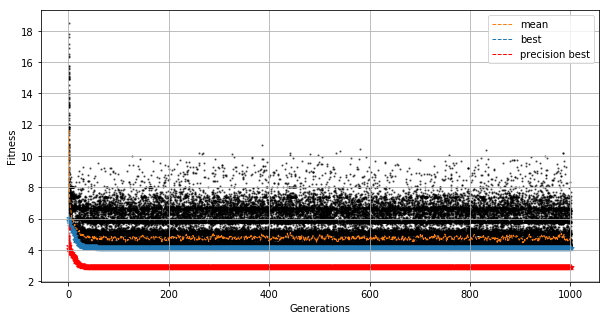

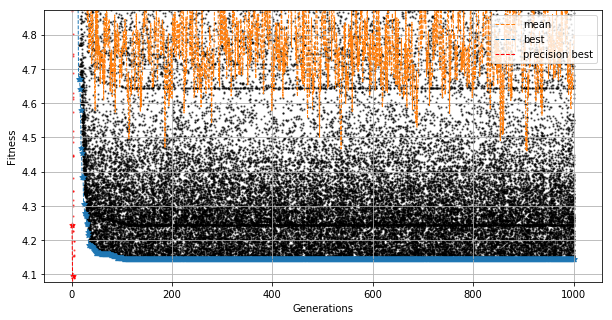

Total elapsed time: 15.048
Total training time: 0.000


In [6]:
ti_all = time()
winner, best_fit, ranking = generational.evolve()
print("Total elapsed time: %0.3f" % (time() - ti_all))
print("Total training time: %0.3f" % fitness.time)

In [ ]:
N = 100
values = [0.1, 0.15, 0.20, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
results = []
for num_parents in values:
    partial_results = []
    for _ in range(N):
        generational = GenerationalGA(fitness=fitness, num_parents=num_parents, chromosome=c, parent_selector=p, generations=generations,
                                  num_population=population, maximize_fitness=maximize_fit, 
                                  training_hours=train_time, folder=folder, statistical_validation=stat_val,
                                 save_progress=save_progress, age_survivors_rate=age_survivors_rate,
                                 precision_val=precision_val, precision_individuals=precision_individuals)
        winner, best_fit, ranking = generational.evolve(show=False)
        partial_results.append(best_fit)
    results.append(partial_results)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline



In [ ]:
h = np.array(results)
print(h.shape)
h = np.mean(h, axis=-1)
print(h.shape)

plt.plot(values, h)
plt.xticks(values)
plt.show()

In [ ]:
plt.plot(values, h)
plt.xticks(values)
plt.show()